# Tests

## 1. Tests for iterations number

Below tests for sinuses functions (see [Description of tests functions properties](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/Tests/Description.pdf) part 1.1). We generate this functions for constant array of lists of parameters. A square in task is square with vertices $(0, 0), (0, 1), (1, 0), (1, 1)$.

This functions met conditions of lemma 2 (see [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf)).

Each point on graph is parameter of task - upper bound for iterations number - and iterations number.

<IPython.core.display.Javascript object>


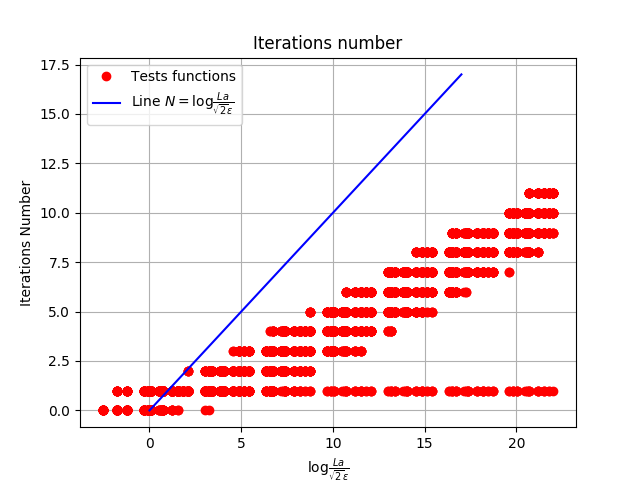

In [1]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
%matplotlib notebook

eps = [0.1**i for i in range(7)]
comparison.num_iter_tests(eps)

Results of this experiment met theoretical results for number of iterations (see Theorem 4.1 in [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf)).

## 2. Estimates for accuracy of solution on segment

There are three strategies for to stop search of solution on segment. Below $\delta$ is a distance between current point-approximation and accurate solution.

* **The first strategy** - Little big
$$\delta \leq \frac{M_{der}}{L},$$

where $L$ is a Lipschitz constant for *gradient*, $M_{der}$ is a lower bound of derivative with the respect to $y$ for parallel to axis $Ox$ segment and derivative with the respect to $x$ for parallel to axis $Oy$ segment in point solution on segment. For this strategy an estimate is computed on each new segment. This strategy is workable (see theorem 4.1 in [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf))

* **The second strategy** - Constant estimate for all segments

$$\delta \leq \frac{\epsilon}{2La\sqrt{5}\log_2\frac{2Ma\sqrt{2}}{\epsilon}},$$

where $L$ and $M$ are Lipschitz constant for *gradient* and *function*, $a$ is a size of square, $\epsilon$ is a required accuracy of initial task's solution. This strategy requires to compute the estimate one time for the one start method. There is proof for this istimate in theorem 1 in [Article of Pasechnyuk and Stonyakin](https://arxiv.org/pdf/1812.10300.pdf).

* **The third strategy** - Comparison with gradient in current point

$$\delta \leq \frac{|f'(\textbf{x}_{cur})|}{L},$$

where $\textbf{x}_{cur}$ is current point-approximation, $L$ is a Lipschitz constant for *gradient*. The $f'(\textbf{x}_{cur})$ is a derivative with the respect to $x$ for parallel to axis $Oy$ segment and is a derivative with the respect to $y$ for parallel to axis $Ox$.

**Important remark**: in the halving square method we use golden search selection as method that solve one-dimensional task.

In [3]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import estimates
%matplotlib notebook

epsilon = [0.1**(i) for i in range(7)]
estimates.get_tests_estimates(epsilon)

eps =  1.0e+00
Mean time (True gradient) = 0.85ms
Mean time (Constant estimate) = 1.52ms
Mean time (Current gradient) = 0.99ms
eps =  1.0e-01
Mean time (True gradient) = 1.46ms
Mean time (Constant estimate) = 3.02ms
Mean time (Current gradient) = 1.73ms
eps =  1.0e-02
Mean time (True gradient) = 1.98ms
Mean time (Constant estimate) = 4.55ms
Mean time (Current gradient) = 2.33ms
eps =  1.0e-03
Mean time (True gradient) = 2.63ms
Mean time (Constant estimate) = 6.76ms
Mean time (Current gradient) = 3.11ms
eps =  1.0e-04
Mean time (True gradient) = 3.51ms
Mean time (Constant estimate) = 9.71ms
Mean time (Current gradient) = 4.15ms
eps =  1.0e-05
Mean time (True gradient) = 4.12ms
Mean time (Constant estimate) = 12.51ms
Mean time (Current gradient) = 4.89ms
eps =  1.0e-06
Mean time (True gradient) = 4.87ms
Mean time (Constant estimate) = 16.15ms
Mean time (Current gradient) = 5.76ms


## 3. Comparison for Quadric Functions

1807.7974014329695


<IPython.core.display.Javascript object>


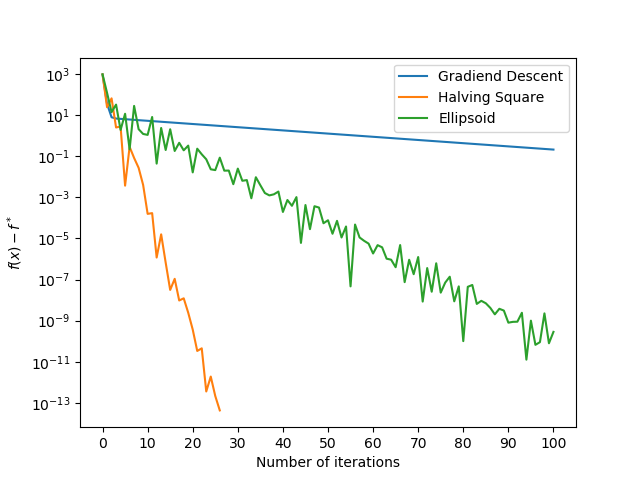

Gradiend Descent 0.0045
Halving Square 0.0209
Ellipsoid 0.0283


In [2]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
np.random.seed(3)
res = comparison.qf_comparison(1e-13)

In [ ]:
3.781791123725987 -0.6757508447970517
-1.6090439205379155 -0.10176415464209798

## 4. Iterations number for Quadratic functions 

12447.633689643006


<IPython.core.display.Javascript object>


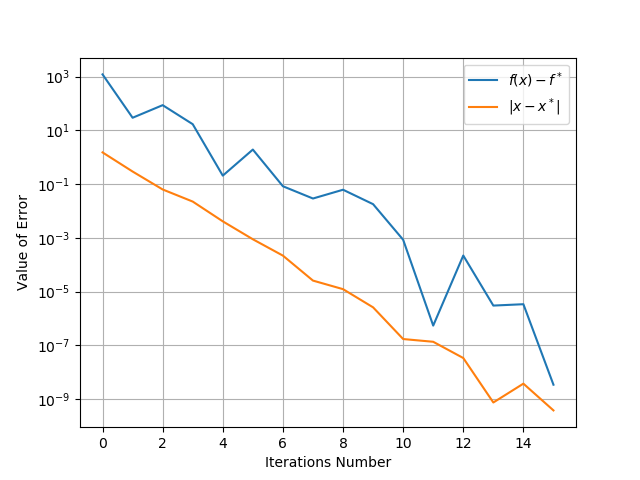

Theoretical Iteration Number through function constant 40.0
Theoretical Iteration Number through gradient constant 20.0


In [8]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
res = comparison.qf_test(1e-8)

14.422205101855956


<IPython.core.display.Javascript object>


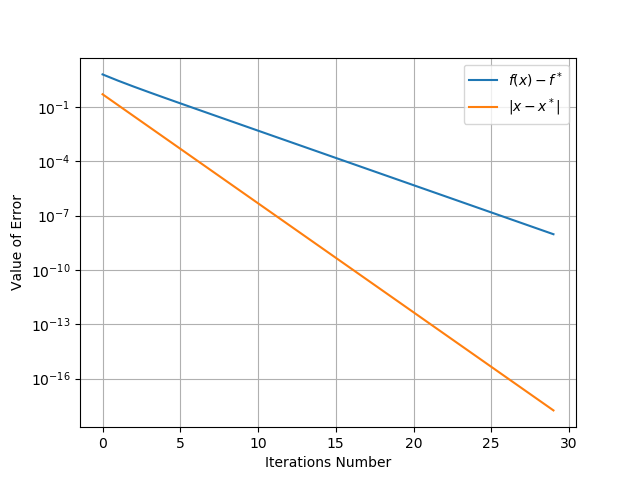

Theoretical Iteration Number through function constant 30.0
Theoretical Iteration Number through gradient constant 14.0


In [9]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
res = comparison.qf_test_2(1e-8)